In [3]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/AzharAli05/Resume-Screening-Dataset/dataset.csv")

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.to_csv("Resume_Screening_Dataset.csv", index=False)

In [5]:
df.rename(columns={"Role": "Category"}, inplace=True)

In [6]:
df.head()

,Category,Resume,Decision,Reason_for_decision,Job_Description
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...,reject,Lacked leadership skills for a senior position.,Be part of a passionate team at the forefront ...
1,Game Developer,Here's a professional resume for Ann Marshall:...,select,Strong technical skills in AI and ML.,Help us build the next-generation products as ...
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...,reject,Insufficient system design expertise for senio...,We need a Human Resources Specialist to enhanc...
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...,select,Impressive leadership and communication abilit...,Be part of a passionate team at the forefront ...
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...,reject,Lacked leadership skills for a senior position.,We are looking for an experienced E-commerce S...


In [7]:
df.drop(columns=["Decision","Reason_for_decision","Job_Description"], inplace=True)

In [8]:
df.head()

,Category,Resume
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...
1,Game Developer,Here's a professional resume for Ann Marshall:...
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df.shape

(10174, 2)

In [11]:
df["Category"].value_counts()

Category
Data Scientist                  538
Software Engineer               480
Product Manager                 458
Data Engineer                   447
UI Engineer                     375
Data Analyst                    329
data engineer                   307
software engineer               307
product manager                 303
data scientist                  287
E-commerce Specialist           268
DevOps Engineer                 266
Machine Learning Engineer       265
Human Resources Specialist      262
Digital Marketing Specialist    260
Robotics Engineer               257
Cloud Architect                 254
Blockchain Developer            251
QA Engineer                     251
Mobile App Developer            247
Full Stack Developer            246
Database Administrator          243
Cloud Engineer                  240
Game Developer                  239
Content Writer                  238
AR/VR Developer                 237
Cybersecurity Analyst           234
UX Designer        

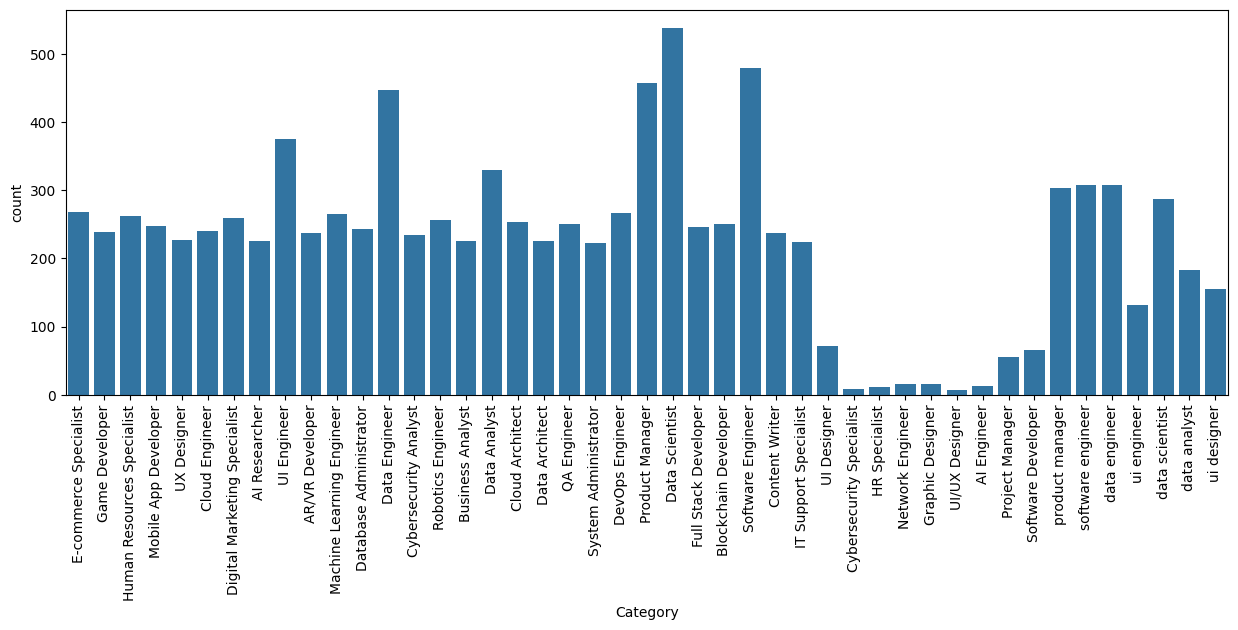

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Resume'][0]

'Here\'s a professional resume for Jason Jones:\n\nJason Jones\nE-commerce Specialist\n\nContact Information:\n\n* Email: [jasonjones@email.com](mailto:jasonjones@email.com)\n* Phone: 555-123-4567\n* LinkedIn: linkedin.com/in/jasonjones\n\nSummary:\nResults-driven E-commerce Specialist with 5+ years of experience in inventory management, SEO, online advertising, and analytics. Proven track record of increasing online sales, improving website traffic, and optimizing inventory levels. Skilled in analyzing complex data sets, identifying trends, and making data-driven decisions. Passionate about staying up-to-date with the latest e-commerce trends and technologies.\n\nProfessional Experience:\n\nE-commerce Specialist, XYZ Corporation (2018-Present)\n\n* Managed inventory levels across multiple channels, resulting in a 25% reduction in stockouts and a 15% reduction in overstocking\n* Developed and implemented SEO strategies that increased website traffic by 30% and improved search engine ra

In [14]:
print('Original Category Distribution')
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()

balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)

print('\nBalanced Category Distribution after Oversampling')
print(df['Category'].value_counts())

Original Category Distribution
Category
Data Scientist                  538
Software Engineer               480
Product Manager                 458
Data Engineer                   447
UI Engineer                     375
Data Analyst                    329
data engineer                   307
software engineer               307
product manager                 303
data scientist                  287
E-commerce Specialist           268
DevOps Engineer                 266
Machine Learning Engineer       265
Human Resources Specialist      262
Digital Marketing Specialist    260
Robotics Engineer               257
Cloud Architect                 254
Blockchain Developer            251
QA Engineer                     251
Mobile App Developer            247
Full Stack Developer            246
Database Administrator          243
Cloud Engineer                  240
Game Developer                  239
Content Writer                  238
AR/VR Developer                 237
Cybersecurity Analyst   

In [15]:
import re
import string
def CleanResume(txt):
    txt = re.sub(r'http\S+', ' ', txt)
    
    # Remove mentions (e.g., @username)
    txt = re.sub(r'@\S+', ' ', txt)
    
    # Remove hashtags (keeping words)
    txt = re.sub(r'#\S+', ' ', txt)
    
    # Remove RT (retweets) and common Twitter elements
    txt = re.sub(r'\bRT\b|cc', ' ', txt)
    
    # Remove special characters, punctuations
    txt = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', txt)
    
    # Remove numbers
    txt = re.sub(r'\d+', ' ', txt)
        
    # Remove extra whitespace
    txt = re.sub(r'\s+', ' ', txt).strip()
    
    # Convert to lowercase
    txt = txt.lower()
    
    return txt
    

In [16]:
CleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")


'my webiste like is this and a ess it'

In [17]:
df['Resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
text = tfidf.transform(df['Resume'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape

((19368, 18421), (4842, 18421))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('\nKNeighborsClassifierResults:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
report_dict = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert to DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Round values to 4 decimal places
report_df = report_df.round(4)

print("\nClassification Report:")
print(report_df)


KNeighborsClassifierResults:
Accuracy: 0.9552

Classification Report:
                              precision  recall  f1-score    support
AI Engineer                      1.0000  1.0000    1.0000   100.0000
AI Researcher                    1.0000  1.0000    1.0000   102.0000
AR/VR Developer                  1.0000  0.9596    0.9794    99.0000
Blockchain Developer             1.0000  1.0000    1.0000   114.0000
Business Analyst                 1.0000  0.9914    0.9957   116.0000
Cloud Architect                  1.0000  0.9806    0.9902   103.0000
Cloud Engineer                   0.9810  1.0000    0.9904   103.0000
Content Writer                   1.0000  0.9915    0.9957   118.0000
Cybersecurity Analyst            1.0000  1.0000    1.0000   117.0000
Cybersecurity Specialist         1.0000  1.0000    1.0000   111.0000
Data Analyst                     0.9358  0.9623    0.9488   106.0000
Data Architect                   0.9914  1.0000    0.9957   115.0000
Data Engineer                   

In [24]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
report_dict = classification_report(y_test, y_pred_svc, output_dict=True)

# Convert to DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Round values to 4 decimal places
report_df = report_df.round(4)

print("\nClassification Report:")
print(report_df) 


SVC Results:
Accuracy: 0.9961
Confusion Matrix:
[[100   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   0 119   0]
 [  0   0   0 ...   0   0  98]]

Classification Report:
                              precision  recall  f1-score    support
AI Engineer                      1.0000  1.0000    1.0000   100.0000
AI Researcher                    1.0000  1.0000    1.0000   102.0000
AR/VR Developer                  1.0000  1.0000    1.0000    99.0000
Blockchain Developer             1.0000  1.0000    1.0000   114.0000
Business Analyst                 1.0000  1.0000    1.0000   116.0000
Cloud Architect                  1.0000  1.0000    1.0000   103.0000
Cloud Engineer                   1.0000  1.0000    1.0000   103.0000
Content Writer                   1.0000  1.0000    1.0000   118.0000
Cybersecurity Analyst            1.0000  1.0000    1.0000   117.0000
Cybersecurity Specialist         1.0000  1.00

In [25]:
import pickle
le = LabelEncoder()
le.fit(df['Category'])  # y is your category labels
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open('encoder.pkl', 'wb'))